# **SOCIAL NETWORK ADDS**

inserting all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
sns.set()

reading the data

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.count()

Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

plotting the data

<ipython-input-9-64ac6cc63ed0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],)


<Axes: xlabel='Age', ylabel='Density'>

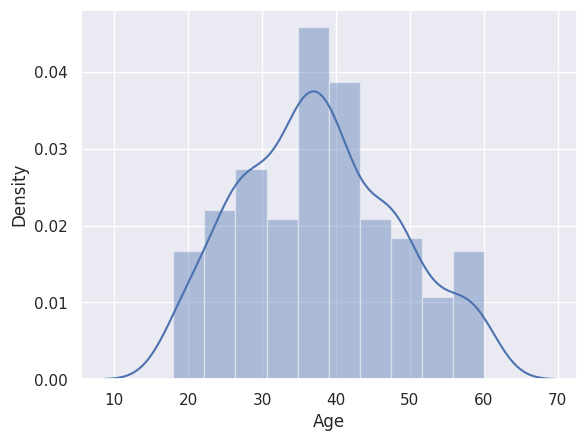

In [9]:
sns.distplot(df['Age'],)

<ipython-input-10-00b0985e4dbc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'],bins=30)


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

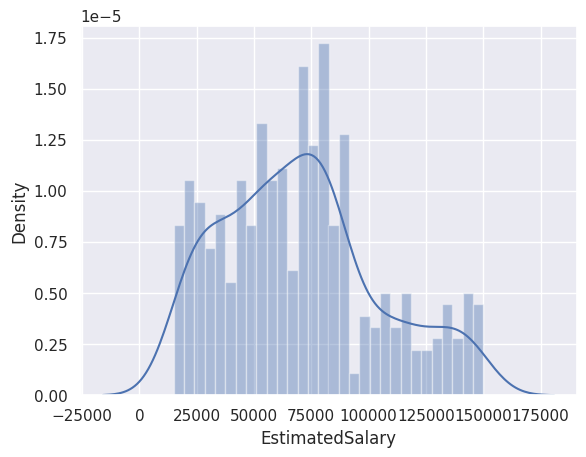

In [10]:
sns.distplot(df['EstimatedSalary'],bins=30)

<Axes: ylabel='EstimatedSalary'>

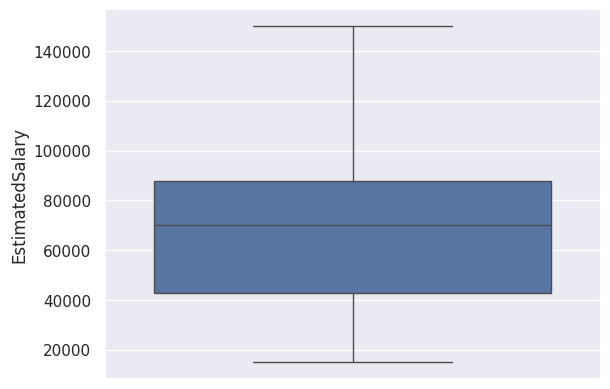

In [11]:
sns.boxplot(df['EstimatedSalary'])

<Axes: ylabel='Age'>

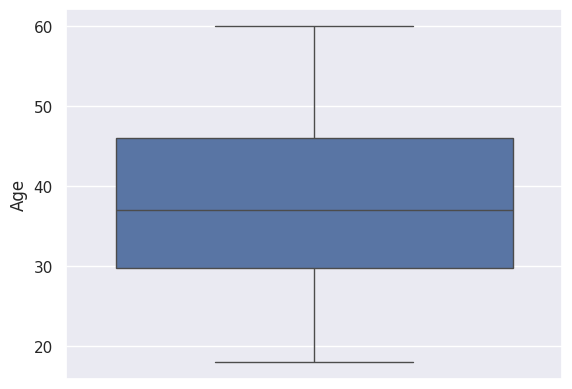

In [12]:
sns.boxplot(df['Age'])

SPLITTING THE DATA

In [13]:
X=df.iloc[:,:2]
Y=df['Purchased']

In [14]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [15]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Scaling our data and splitting it for train and test modules

In [16]:
scale=StandardScaler()
scale.fit(X)
D=scale.transform(X)
x_train, x_test, y_train, y_test = train_test_split(D,Y, test_size=0.20,random_state=300)

Building classification models

Logistics Regression

In [17]:
R=LogisticRegression()
R.fit(x_train,y_train)
pred=R.predict(x_test)
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))

[[51  3]
 [ 8 18]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.86      0.69      0.77        26

    accuracy                           0.86        80
   macro avg       0.86      0.82      0.83        80
weighted avg       0.86      0.86      0.86        80



k-nearest neighbors

Text(0, 0.5, 'Error Rate')

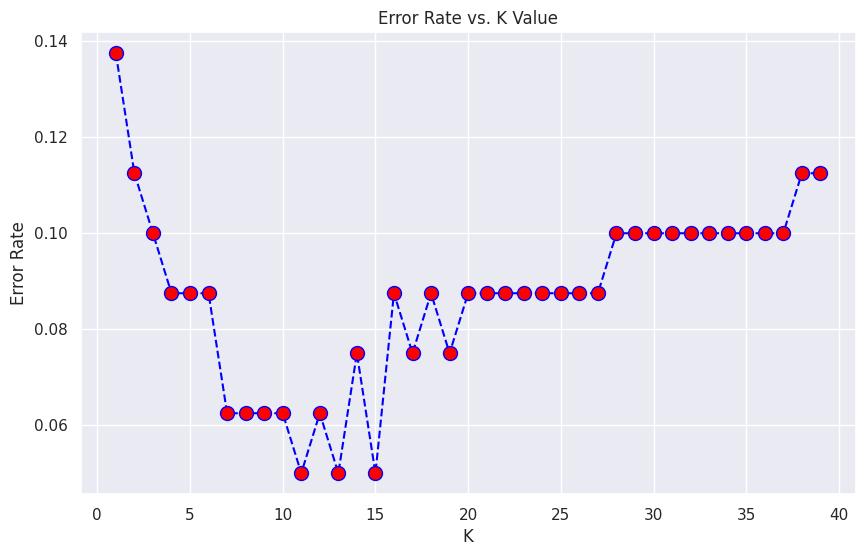

In [18]:
error_rate = []
for i in range(1,40):

 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
a=KNeighborsClassifier(n_neighbors=11)
a.fit(x_train,y_train)
predictions=a.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

[[51  3]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.89      0.96      0.93        26

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



Random Forest Classifier

In [20]:
N=RandomForestClassifier(n_estimators=500)
N.fit(x_train,y_train)
prediction=N.predict(x_test)
print(metrics.confusion_matrix(y_test,prediction))
print(metrics.classification_report(y_test,prediction))

[[49  5]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.83      0.92      0.87        26

    accuracy                           0.91        80
   macro avg       0.89      0.92      0.90        80
weighted avg       0.92      0.91      0.91        80



Decision tree classifier

In [21]:
Z=DecisionTreeClassifier()
Z.fit(x_train,y_train)
p=Z.predict(x_test)
print(metrics.confusion_matrix(y_test,p))
print(metrics.classification_report(y_test,p))

[[50  4]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.85      0.88      0.87        26

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



SVM (Support Vector Machines)

In [23]:
model = SVC()
model.fit(x_train,y_train)
pr = model.predict(x_test)
print(metrics.confusion_matrix(y_test,pr))
print(metrics.classification_report(y_test,pr))

[[51  3]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.90      1.00      0.95        26

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



After analysing the data and building models using simple classification methods we can infer that SVM(support vector machine) gives us the best result with an accuracy of **96**%